### Import necessary modules and set graphing defaults

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Set Matplotlib default text sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

### - Import and prepare data

In [2]:
# Import Boston housing dataset and transform into pandas df
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df
df_boston = sklearn_to_df(load_boston())
df_boston.rename(columns={"target": "MEDV"}, inplace=True)

# Randomize dataframe 
df_boston = df_boston.sample(frac=1).reset_index(drop=True)

# Filter dataset for prettier graph (yes this is cheating)
df_boston = df_boston[df_boston['MEDV'] < 50]
df_boston = df_boston[df_boston['RM'] > 4.5]

# Full dataset
X_full = df_boston[['RM']]
y_full = df_boston[['MEDV']]*1000

### - Plot the data

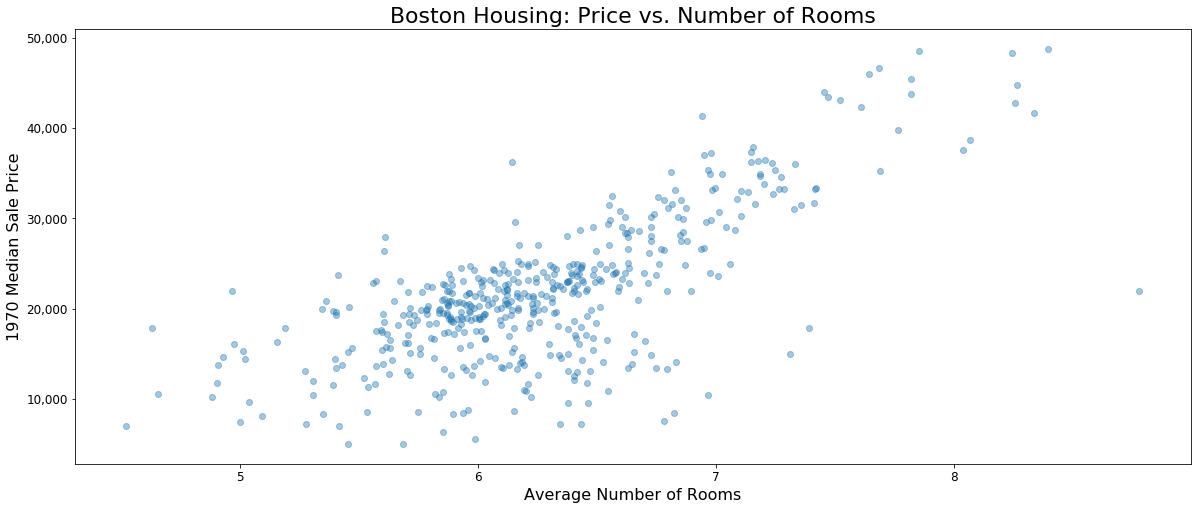

In [3]:
fig, ax = plt.subplots(figsize=(20,8))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(X_full,y_full, label="Full Dataset", alpha=0.4)
plt.xlabel('Average Number of Rooms')
plt.ylabel('1970 Median Sale Price')
plt.title("Boston Housing: Price vs. Number of Rooms") 
# plt.legend(loc=2, prop={'size': 15})
plt.show()


### Simple Linear Regression - Explanation

Simple linear regression is an age old technique where you take a series of (x,y) data points to create a linear equation y = mx + b. Using this you can predict new values of y when given x. 

### Simple Linear Regression - Graphically

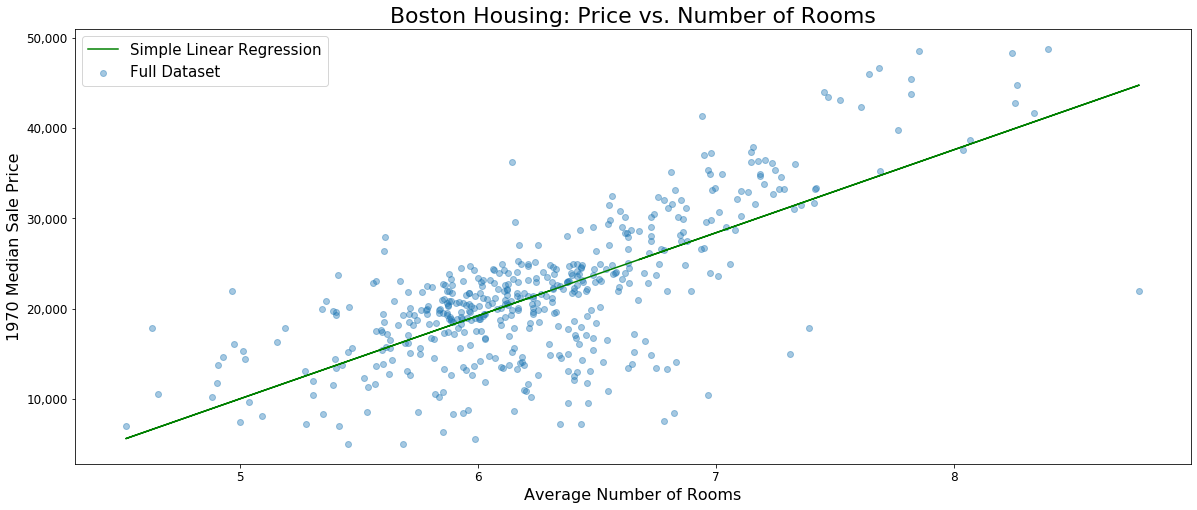

In [4]:
ols = LinearRegression()

ols.fit(X_full, y_full)
ols.predict(X_full)

fig, ax = plt.subplots(figsize=(20,8))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(X_full,y_full, label="Full Dataset", alpha=0.4)
plt.plot(X_full, ols.predict(X_full), c='g', lw=1.5, label='Simple Linear Regression')
plt.xlabel('Average Number of Rooms')
plt.ylabel('1970 Median Sale Price')
plt.title("Boston Housing: Price vs. Number of Rooms") 
plt.legend(loc=2, prop={'size': 15})
plt.show()

### Simple Linear Regression - Spelled Out

In [5]:
# Import correct modules
from sklearn.linear_model import LinearRegression

# Create linear model instance
lm = LinearRegression()

# Fit the X and Y data
lm.fit(X_full, y_full)

# Get equation of the line
print('Equation of the line: y = ', round(ols.coef_.item()),'x + ', round(ols.intercept_.item()),'\n', sep='')

# Get predictions of the line
print('First 5 predictions of the line: ', lm.predict(X_full)[:5],'\n')

# See how this scores on the data
print('The R^2 score:', round(lm.score(X_full, y_full), 3),'\n')

# Use cross validation to get a more representative score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_full, y_full, cv=6)
print("Cross-validated R^2 scores:", scores)
print("Cross-validated R^2 score Average:", round(scores.mean(),2))

Equation of the line: y = 9191x + -35928

First 5 predictions of the line:  [[21982.38241586]
 [21660.70846777]
 [21136.83946661]
 [24289.24415783]
 [15695.95440188]] 

The R^2 score: 0.517 

Cross-validated R^2 scores: [0.31799883 0.53440509 0.64823665 0.58685499 0.34478134 0.40766249]
Cross-validated R^2 score Average: 0.47


### Multiple Linear Regression - Explanation

Multiple linear regression is an an improvement on the age old linear regression technique where you take a series of (x1,x2,x3,..., y) data points to create a linear equation y = m1x1 + m2x2 + m3x3.... + b. Using this you can predict new values of y when given new x values. The result is a multi-dimensional plane rather than just a line (see graph below)

### Multiple Linear Regression - Graphically

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/560/0*rGSfRsMjiQeG5jof.png")

### Multiple Linear Regression - Spelled Out

In [7]:
# Full dataset
X_full = df_boston.loc[:, df_boston.columns != 'MEDV']
y_full = df_boston[['MEDV']]*1000

# Import correct modules
from sklearn.linear_model import LinearRegression

# Create linear model instance
lm = LinearRegression()

# Fit the X and Y data
lm.fit(X_full, y_full)

#Get intercept
print('The intercept of the multiple linear regression model is: \n', round(lm.intercept_.item()),'\n','\n')

# Get predictions of the line
print('First 5 predictions of the line: ', lm.predict(X_full)[:5],'\n','\n')

# See how this scores on the data
print('The R^2 score:', round(lm.score(X_full, y_full), 3),'\n','\n')

# Use cross validation to get a more representative score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_full, y_full, cv=6)
print("Cross-validated R^2 scores:", scores)
print("Cross-validated R^2 score Average:", round(scores.mean(),2),'\n','\n')

# coefficients for all numerical features
print('The coefficients of the multiple linear regression model are: \n')
colnames = X_full.columns
result = pd.DataFrame(lm.coef_.round())
result.columns = colnames.tolist()
result['intercept'] = round(lm.intercept_.item())
result = result.transpose()
result.columns = ['coefficient']
result

The intercept of the multiple linear regression model is: 
 21525 
 

First 5 predictions of the line:  [[16276.88828093]
 [23950.92270785]
 [18700.88099778]
 [30329.25103814]
 [12748.59933121]] 
 

The R^2 score: 0.801 
 

Cross-validated R^2 scores: [0.76883548 0.79310406 0.83847327 0.76266846 0.7781692  0.65606714]
Cross-validated R^2 score Average: 0.77 
 

The coefficients of the multiple linear regression model are: 



,coefficient
CRIM,-102.0
ZN,26.0
INDUS,-23.0
CHAS,487.0
NOX,-10869.0
RM,5042.0
AGE,-33.0
DIS,-1079.0
RAD,194.0
TAX,-13.0


### Multiple Linear Regression - BEWARE of Multicollinearity

If your model coefficient and intercept values are jumping around wildly after each fitting of your model you might have a case of multicollinearity. I'm so sorry...

Multicollinearity is when two variables represent the same thing. For instance if you were predicting healthcare costs as a function of age and years until 100 years old... essentially the two explanatory variables are the same thing. The two explanatory variables (age & years until 100 years old) have the potential of making the model unstable. Multicollinearity can disrupt the *Interpretation* and *Inference* of the model. 

If the model was stable you could interpret each of the coefficients as "If we hold all other variables constant, a unit increase in x results in a # increase in y". Since the model is unstable, we can no longer make these claims. Secondly, model inference can result from coefficients values changing drastically and signs flipping.

### Multicollinearity - Test #1 $R^2$ Test

Create a multiple linear regression model with one explanatory variable vs. all the rest. In the example below it seems as if Tax rates and NOX pollution levels may be collinear. Lets imagine that both of these had an R^2 of 1. You should not take out both variables. Only remove one of them. By removing both you would be removing explanatory power.

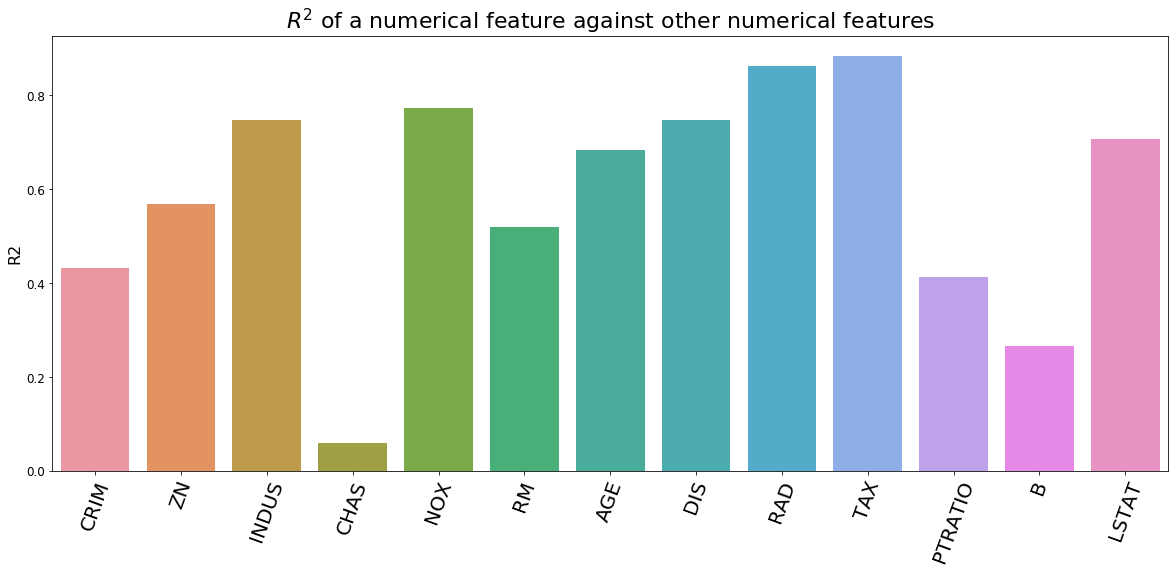

In [8]:
# Creat list of numerical explanatory variables
explanatory_variables = X_full.columns.to_list()

# Create empty dictionary to store reslults of test
scores = {}

# Create model instance
lm = LinearRegression()

# Loop through explanatory variables and fit model to:
    # (X=Explanatory Variable of Interest, y=All other Explanatory Variables)
for feature_name in explanatory_variables:
    df_X = X_full.copy()
    feature_y = X_full[feature_name]
    df_X.drop(feature_name, axis=1, inplace=True)
    lm.fit(df_X, feature_y)
    scores[feature_name] = lm.score(df_X, feature_y)

# Plot results
import seaborn as sns
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'index', y= 'R2', data = pd.DataFrame(scores, index = ['R2']).T.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, size=20)  
plt.xlabel('')
plt.title('$R^2$ of a numerical feature against other numerical features')  
plt.show()

### Multicollinearity - Test #2 P-Value Test

From: https://www.graphpad.com/support/faq/multicollinearity-in-multiple-regression/#:~:text=In%20addition%20to%20the%20overall,the%20fit%20of%20the%20model.

"*What is multicollinearity?
In some cases, multiple regression results may seem paradoxical. Even though the overall P value is very low, all of the individual P values are high. This means that the model fits the data well, even though none of the X variables has a statistically significant impact on predicting Y. How is this possible? When two X variables are highly correlated, they both convey essentially the same information. In this case, neither may contribute significantly to the model after the other one is included. But together they contribute a lot. If you removed both variables from the model, the fit would be much worse. So the overall model fits the data well, but neither X variable makes a significant contribution when it is added to your model last. When this happens, the X variables are collinear and the results show multicollinearity.*"

In [9]:
import statsmodels.api as sm

# removed 'GarageCars','GarageYrBlt', 'TotRmsAbvGrd', 'YearBuilt',
features = X_full   

target = y_full

x = sm.add_constant(features)  # specifying to calculate the intercept  

model = sm.OLS(target, x)
results = model.fit()  

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     146.0
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          7.16e-156
Time:                        16:07:05   Log-Likelihood:                -4646.1
No. Observations:                 485   AIC:                             9320.
Df Residuals:                     471   BIC:                             9379.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.152e+04   4149.577      5.187      0.0

In [10]:
''' calculate the significant coefficients (p-values < 0.05) '''   

pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < 0.05]

The significant coefficients


const      3.176196e-07
CRIM       4.113595e-05
ZN         1.430003e-02
NOX        2.033055e-04
RM         1.366959e-34
AGE        1.287577e-03
DIS        6.042794e-12
RAD        1.462940e-04
TAX        4.972228e-06
PTRATIO    6.575283e-15
B          3.716028e-05
LSTAT      1.339642e-09
dtype: float64

In [11]:
''' calculate the insignificant coefficients (p-values >= 0.05) '''    
print('The insignificant coefficients')
pValues[pValues >= 0.05]

The insignificant coefficients


INDUS    0.621116
CHAS     0.487173
dtype: float64

### Multicollinearity - Test #3 Feature Importance via Ridge and Lasso Regression

Feature importance describes how important a given explanatory variable is for predicting the target variable. Feature importanct can be determined using a wide variety of Machine Learning models. We will investigate ridge and lasso penalized regression. 

What you should remember about these models in the context of multicollinearity and feature importance... If there are two multicollinear features, one of them will drop out with increasing penalization. The most important (variables with predictive value) non-collinear features will remain after increasing penalization.

Article to research ridge and lasso regression fundamentals:
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b#:~:text=Ridge%20and%20Lasso%20regression%20are,the%20magnitude%20of%20the%20coefficients.

#### *Ridge Regression*

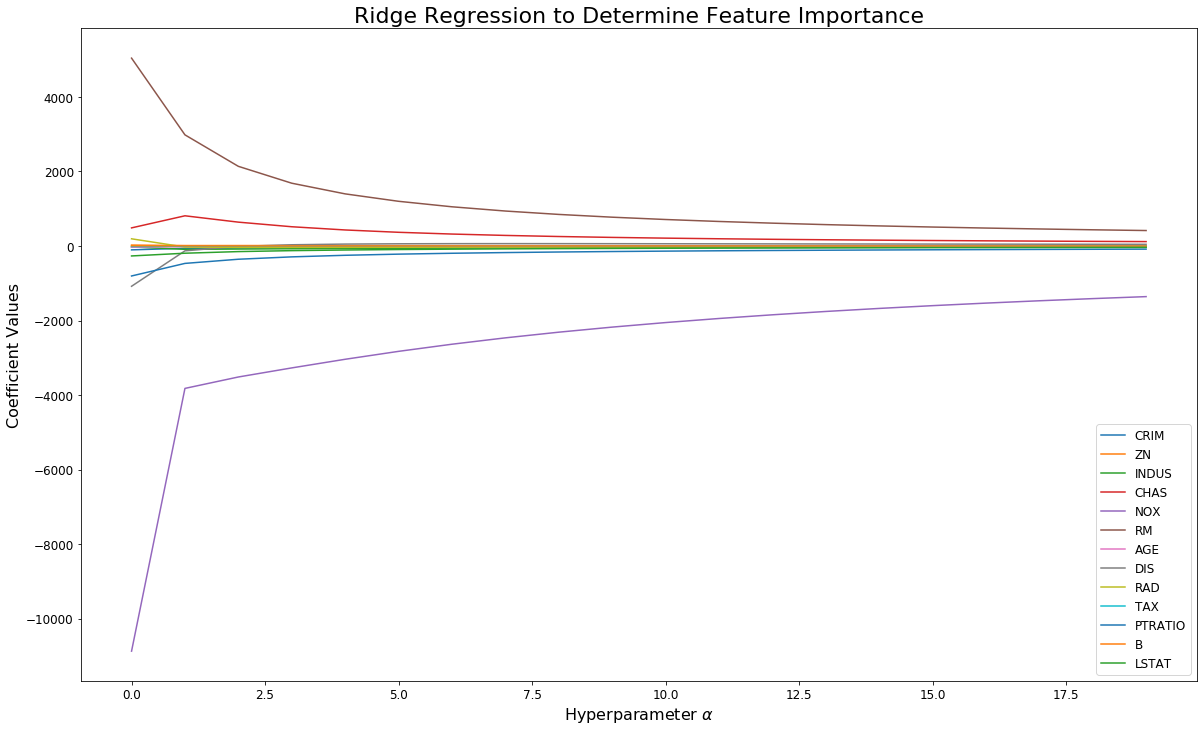

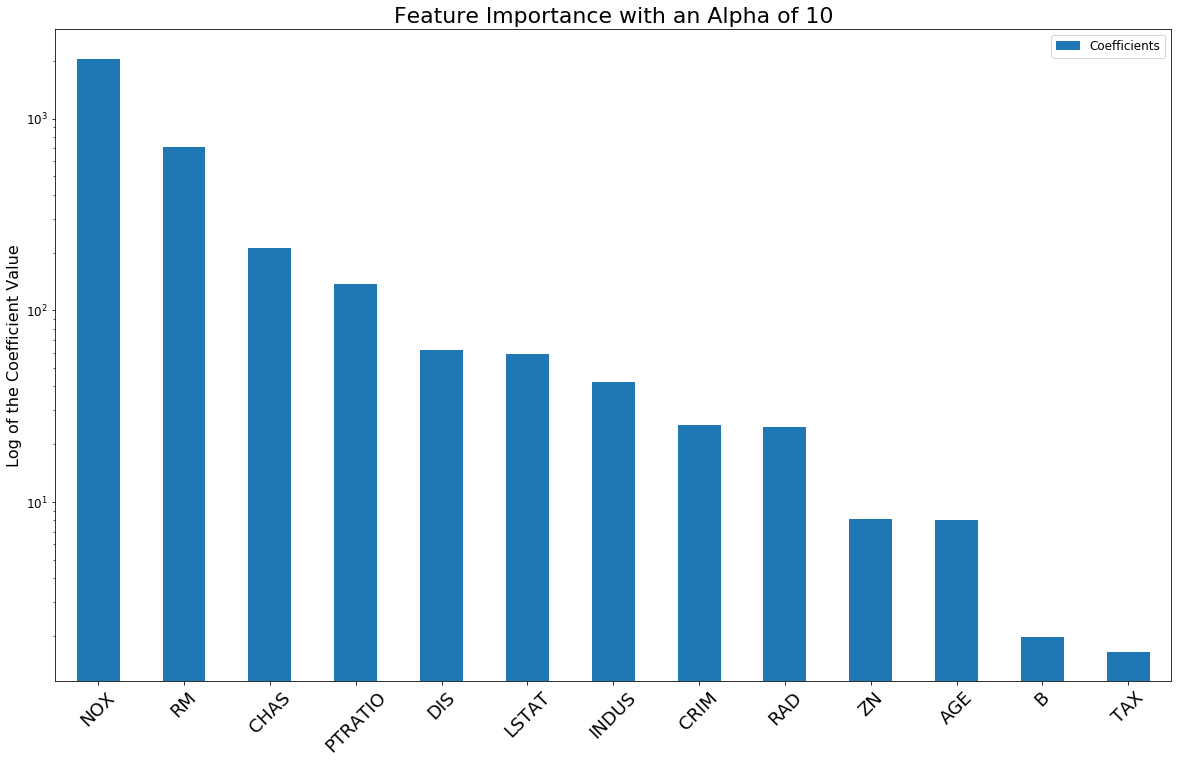

In [12]:
# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create model instance
ridge = Ridge()

# Make sure columns are normalized so that one feature does not appear more important than it is due to high values
ridge.set_params(normalize=True)

# Create empty coefficient list for each iteration of the alpha hyperparameter
coefs = []

# Create all alpha hyperparameters that you want to test
alphas = np.arange(0,20)

# Fit a model with a particular alpha and keep the coefficients stored
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_full, y_full)  
        coefs.append(ridge.coef_)
coefs = pd.DataFrame(np.concatenate(coefs), index = alphas, columns = X_full.columns.to_list())  

# Plot results
plt.rcParams['figure.figsize'] = (20, 12)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.title('Ridge Regression to Determine Feature Importance')
plt.xlabel(r'Hyperparameter $\alpha$')
plt.ylabel(r'Coefficient Values')
plt.show()

def penalized_feature_importance_bar(coefs, alpha):

    df = coefs.reset_index().rename(columns={"index": "Alpha"})
    df = df.iloc[(df['Alpha']-alpha).abs().argsort()[:1]].abs()
    df = df.loc[:, df.columns != 'Alpha']


    df = df.T
    df.columns = ['Coefficients']
    df.sort_values('Coefficients', ascending=False).plot.bar(logy=True, sort_columns=True)
    plt.xticks(fontsize=18, rotation=45)
    plt.ylabel('Log of the Coefficient Value')
    plt.title('Feature Importance with an Alpha of ' + str(alpha))
    plt.show()

alpha=10
penalized_feature_importance_bar(coefs, alpha)

#### *Lasso Regression*

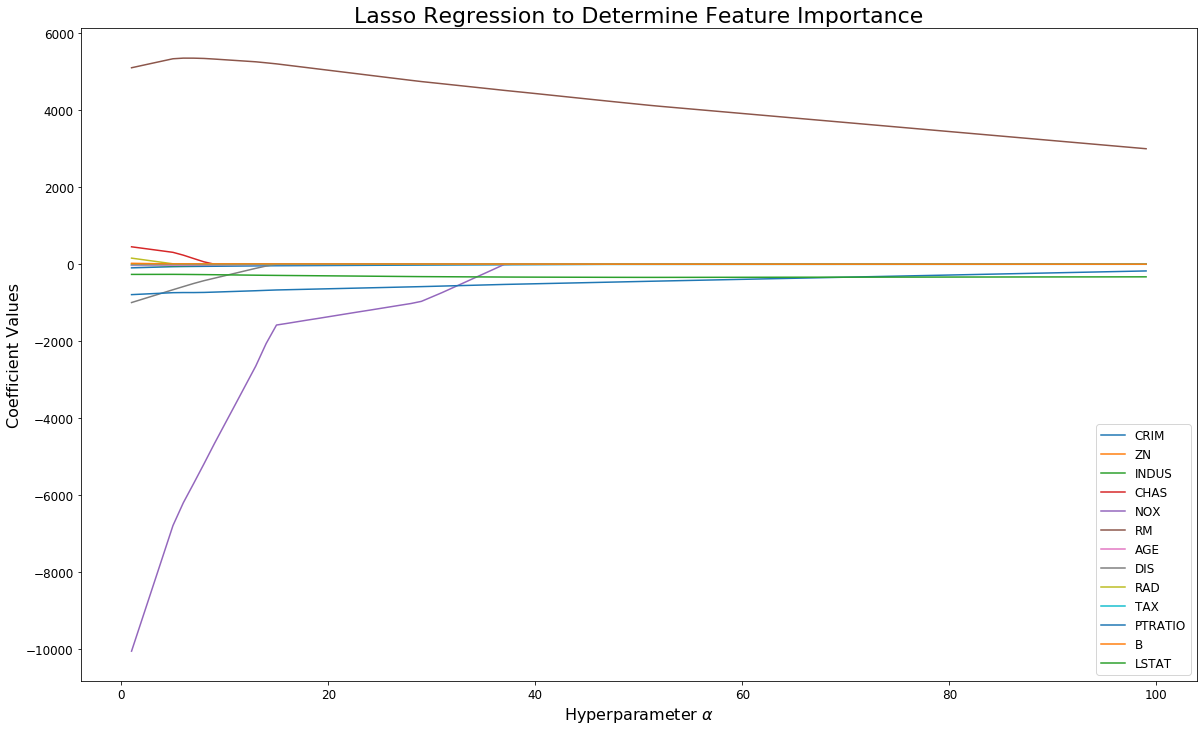

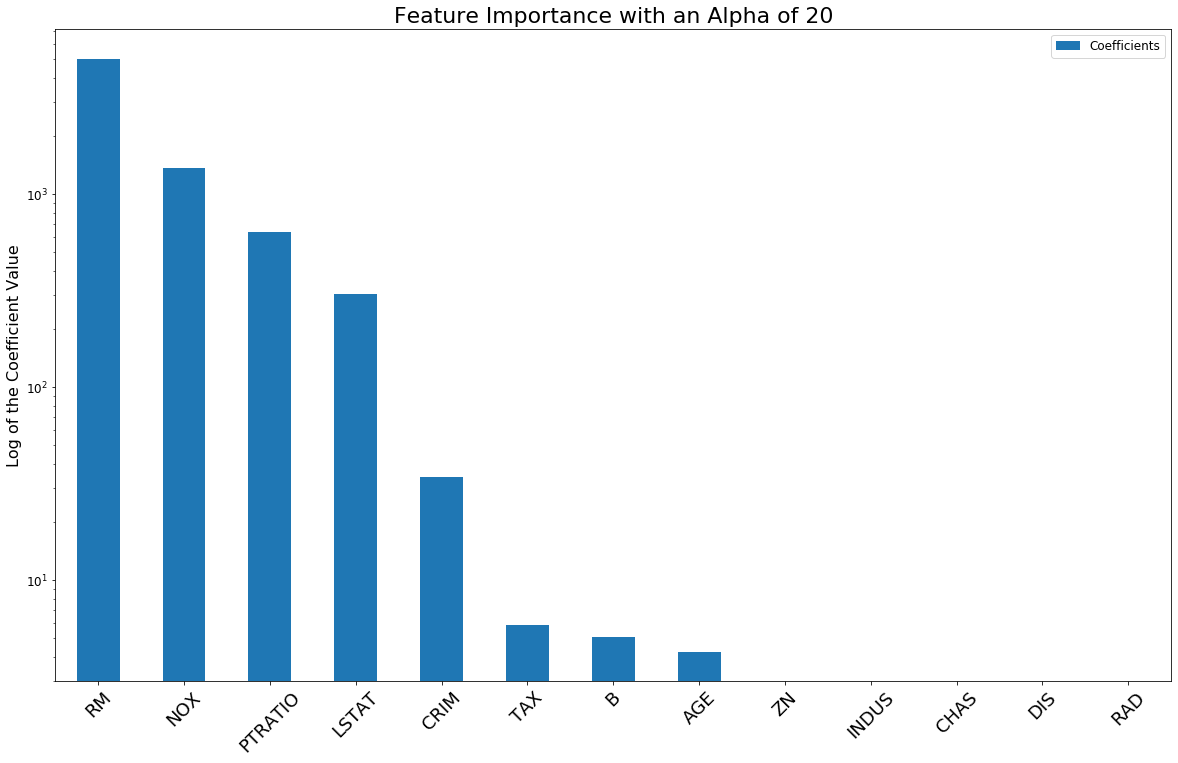

In [13]:
# Create model instance
lasso = Lasso()

# Make sure columns are normalized so that one feature does not appear more important than it is due to high values
lasso.set_params(normalize=True)

# Create empty coefficient list for each iteration of the alpha hyperparameter
coefs = []

# Create all alpha hyperparameters that you want to test
alphas = np.arange(1,100)

# Fit a model with a particular alpha and keep the coefficients stored
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_full, y_full)  
        coefs.append(lasso.coef_)
coefs = pd.DataFrame(coefs, index = alphas, columns = X_full.columns.to_list())  

# Plot results
plt.rcParams['figure.figsize'] = (20, 12)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.title('Lasso Regression to Determine Feature Importance')
plt.xlabel(r'Hyperparameter $\alpha$')
plt.ylabel(r'Coefficient Values')
plt.show()

alpha=20
penalized_feature_importance_bar(coefs, alpha)

#### *Elastic-Net Regression*

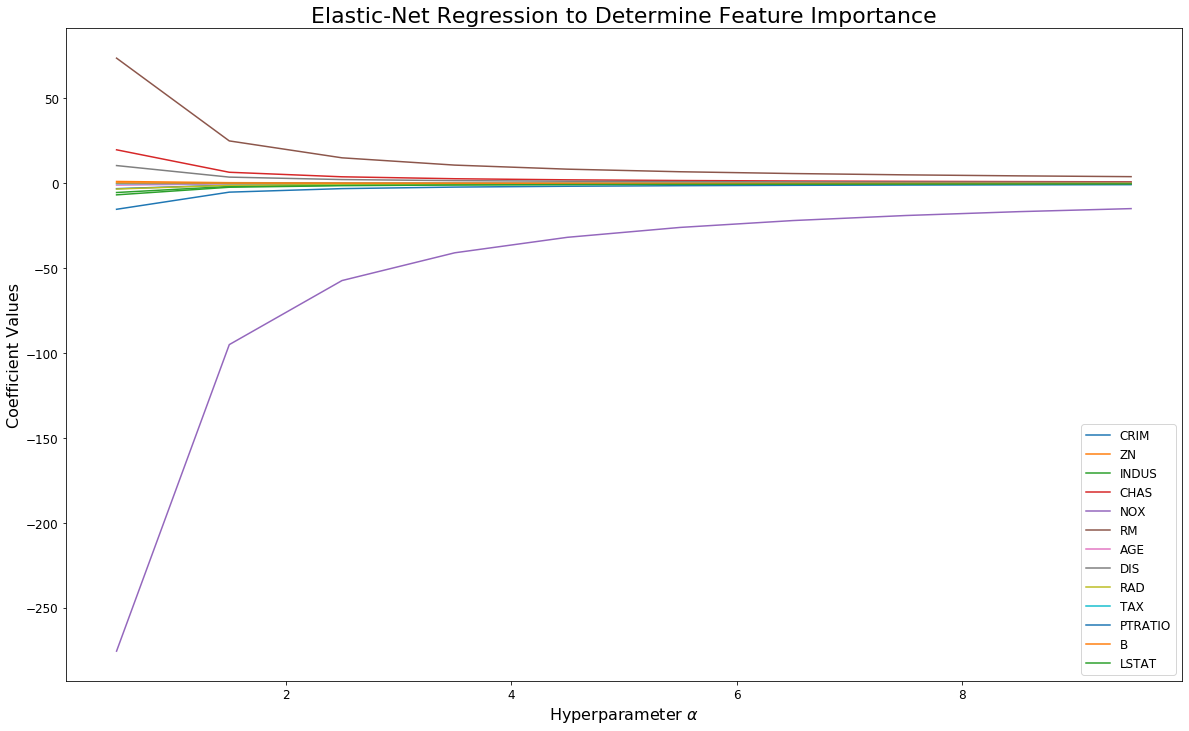

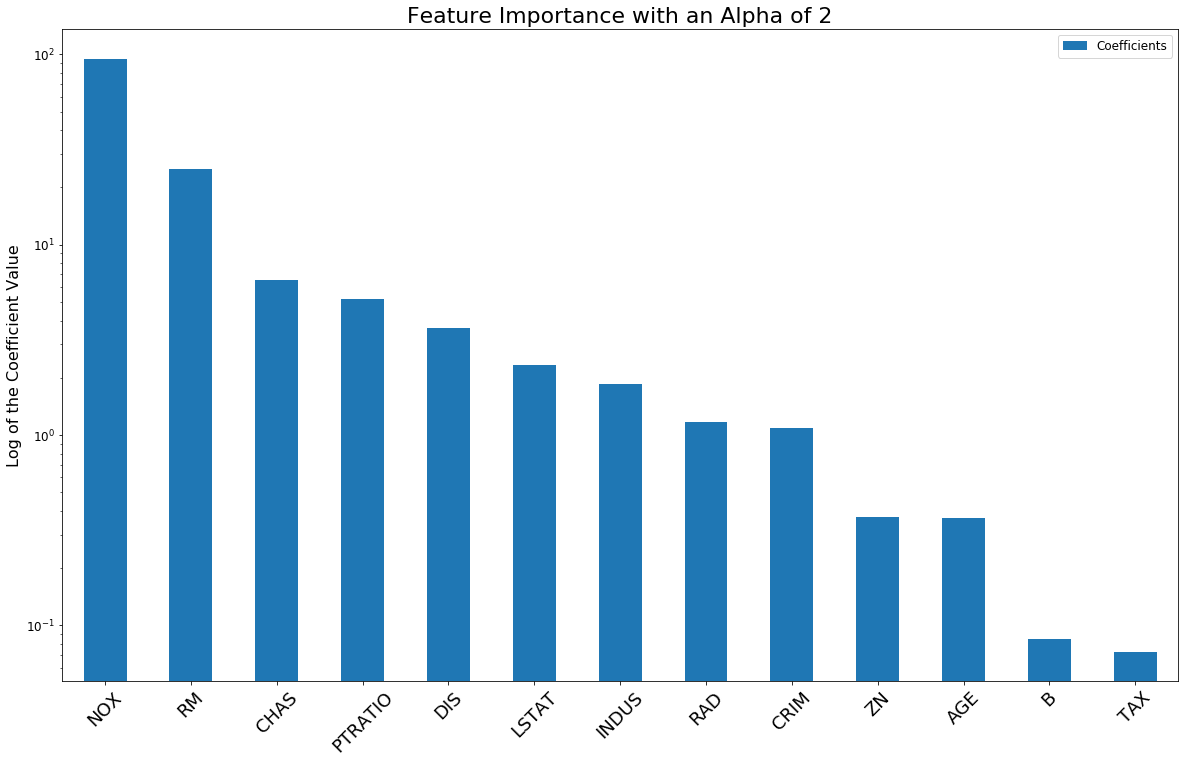

In [14]:
# Create model instance
elastic = ElasticNet(normalize=True)

# Create empty coefficient list for each iteration of the alpha hyperparameter
coefs = []

# Create all alpha hyperparameters that you want to test
alphas = np.arange(0.5,10)

# Fit a model with a particular alpha and keep the coefficients stored
for alpha in alphas:
        elastic = ElasticNet(alpha=alpha, normalize=True, l1_ratio=0.5)
        elastic.fit(X_full, y_full)  
        coefs.append(elastic.coef_)
coefs = pd.DataFrame(coefs, index = alphas, columns = X_full.columns.to_list())  

# Plot results
plt.rcParams['figure.figsize'] = (20, 12)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.title('Elastic-Net Regression to Determine Feature Importance')
plt.xlabel(r'Hyperparameter $\alpha$')
plt.ylabel(r'Coefficient Values')
plt.show()

alpha=2
penalized_feature_importance_bar(coefs, alpha)